In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import SpectralCoclustering
# is this a bad way of doing it
from sklearn import metrics
import torch
from sklearn.cluster import DBSCAN

## All breast cancer cells (tumor and non-tumor)
* TPM_matrix_all_single_cells_GSE75688.csv (original name: GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix_gene_filtering_log_nontumor198tumor317_deg.csv)

In [3]:
bc_all_sc = pd.read_csv("../../data/breast-cancer-GSE75688/TPM_matrix_all_single_cells_GSE75688.csv",
                        header=0, index_col=0)

# transpose to make each instance (cell) a row
bc_all_sc = bc_all_sc.transpose()

# at this stage, first column is GROUP not a gene
# group is tumor (0) or non-tumor (1)
# cell ids are row indexes, not a column in themselves

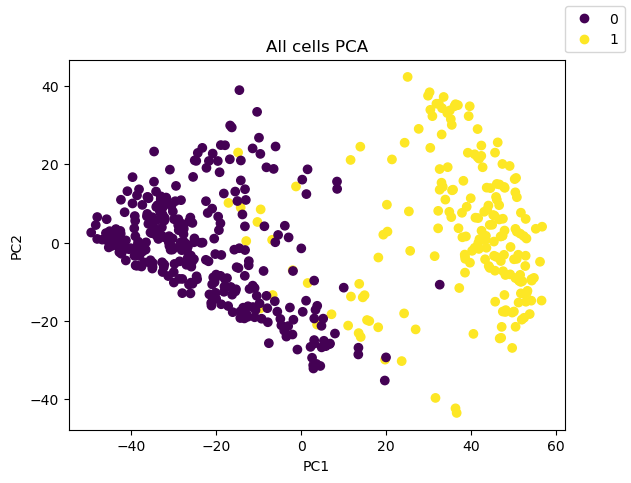

In [4]:
# PCA (simple dimensionality reduction)
pca_2d = PCA(n_components=2)
pca_2d.fit(bc_all_sc.iloc[:,1:])
bc_all_2d_pca = pca_2d.transform(bc_all_sc.iloc[:,1:])

fig, ax = plt.subplots()
# named so that can be accessed for legend?
pca_scatter = ax.scatter(bc_all_2d_pca[:,0], bc_all_2d_pca[:,1],
                         c=bc_all_sc.iloc[:,0])
ax.set_title("All cells PCA")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
fig.legend(*pca_scatter.legend_elements())

Proportion of variance explained: [0.28684504 0.05947521]
Total proportion of variance explained: 0.34632025164000985


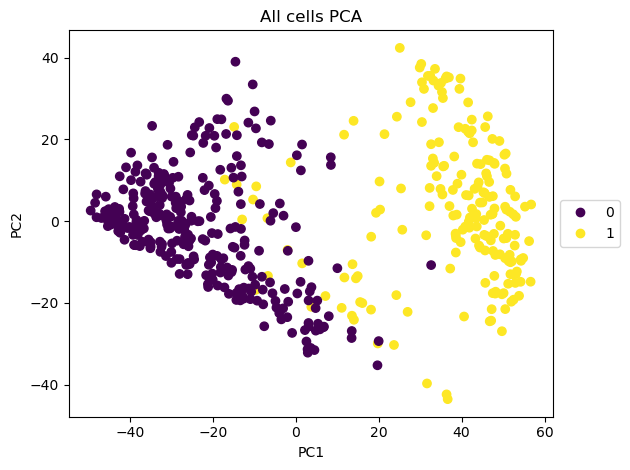

In [55]:
# scatter with simpler control over legend
# PCA (simple dimensionality reduction)
pca_2d = PCA(n_components=2)
pca_2d.fit(bc_all_sc.iloc[:,1:])
bc_all_2d_pca = pca_2d.transform(bc_all_sc.iloc[:,1:])

# changes to a slice DO affect the original, so need to copy
bc_all_colour_labels = list(bc_all_sc.iloc[:,0].copy())
bc_all_colour_labels[bc_all_colour_labels == 0] = "Tumor"
bc_all_colour_labels[bc_all_colour_labels == 1] = "Non-tumor"

group_names = {0:"Tumor", 1:"Non-tumor"}

fig, ax = plt.subplots()
# named so that can be accessed for legend?
pca_scatter = ax.scatter(bc_all_2d_pca[:,0], bc_all_2d_pca[:,1],
                         c=bc_all_sc.iloc[:,0])
ax.set_title("All cells PCA")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.legend(*pca_scatter.legend_elements(), bbox_to_anchor=(1,0.5), loc="center left")
#fig.legend(*pca_scatter.legend_elements(), loc="lower left")
plt.tight_layout()

# HOW TO USE NAME INSTEAD OF NUMBER IN LEGEND [!] [?]
print(f"Proportion of variance explained: {pca_2d.explained_variance_ratio_}")
print(f"Total proportion of variance explained: {sum(pca_2d.explained_variance_ratio_)}")

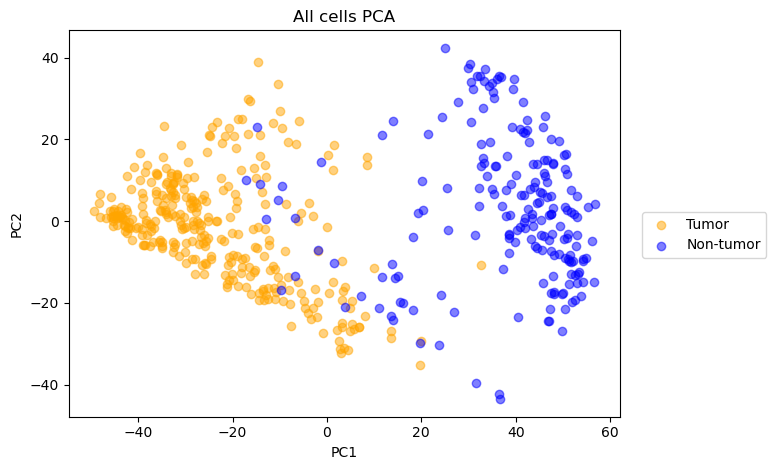

In [6]:
# PCA (simple dimensionality reduction)
pca_2d = PCA(n_components=2)
pca_2d.fit(bc_all_sc.iloc[:,1:])
bc_all_2d_pca = pca_2d.transform(bc_all_sc.iloc[:,1:])

fig, ax = plt.subplots()
ax.scatter(bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 0),0], 
           bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 0),1],
           c="orange", label="Tumor", alpha=0.5)
ax.scatter(bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 1),0], 
           bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 1),1],
           c="b", label="Non-tumor", alpha=0.5)
ax.set_title("All cells PCA")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
fig.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.tight_layout()

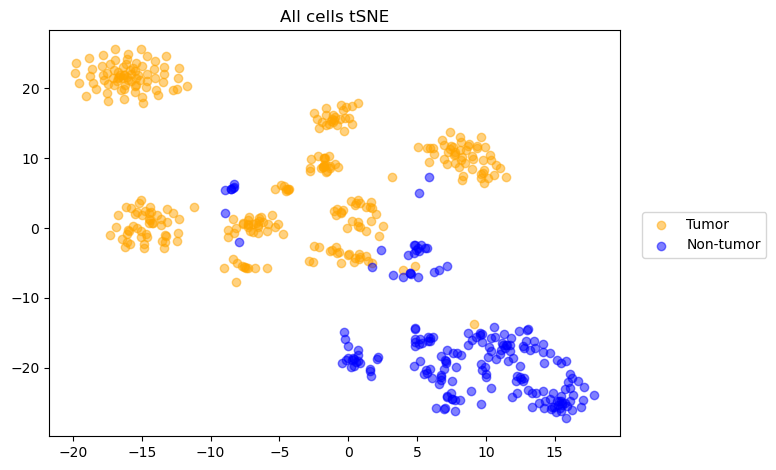

In [7]:
# tSNE
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=1000)
bc_all_2d_tsne = tsne_2d.fit_transform(bc_all_sc.iloc[:,1:])

fig, ax = plt.subplots()
ax.scatter(bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 0),0], 
           bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 0),1],
           c="orange", label="Tumor", alpha=0.5)
ax.scatter(bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 1),0], 
           bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 1),1],
           c="b", label="Non-tumor", alpha=0.5)
ax.set_title("All cells tSNE")
fig.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.tight_layout()

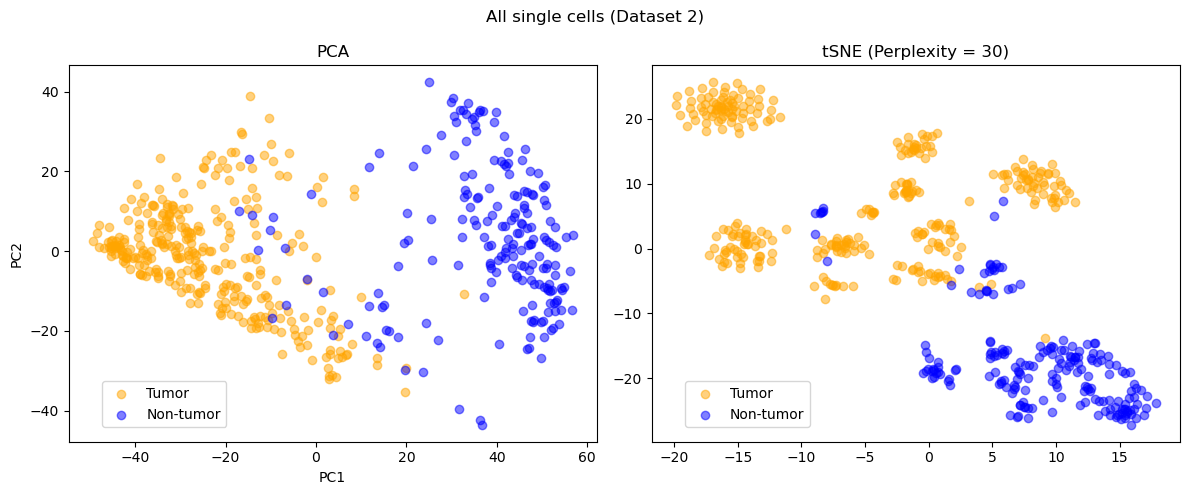

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axs[0].scatter(bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 0),0], 
           bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 0),1],
           c="orange", label="Tumor", alpha=0.5)
axs[0].scatter(bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 1),0], 
           bc_all_2d_pca[(bc_all_sc.loc[:,"group"] == 1),1],
           c="b", label="Non-tumor", alpha=0.5)
axs[0].set_title("PCA")
axs[0].set_ylabel("PC2")
axs[0].set_xlabel("PC1")
axs[0].legend(bbox_to_anchor=(0.05,0.1), loc="center left")

axs[1].scatter(bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 0),0], 
           bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 0),1],
           c="orange", label="Tumor", alpha=0.5)
axs[1].scatter(bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 1),0], 
           bc_all_2d_tsne[(bc_all_sc.loc[:,"group"] == 1),1],
           c="b", label="Non-tumor", alpha=0.5)
axs[1].set_title("tSNE (Perplexity = 30)")
axs[1].legend(bbox_to_anchor=(0.05,0.1), loc="center left")

fig.suptitle("All single cells (Dataset 2)")

plt.tight_layout()
plt.show()

## Tumor cells only
* 317 cells
* 820 genes (keeping filtering from Huang key paper FOR NOW)

Reading in list of cells in each 'subtype' according to key paper

In [9]:
bc_tumor_sc = pd.read_csv("../../data/breast-cancer-GSE75688/TPM_matrix_tumor_single_cells_GSE75688.csv",
                        header=0, index_col=0)

# transpose to make each instance (cell) a row
bc_tumor_sc = bc_tumor_sc.transpose()

In [10]:
bc_tumor_sc.iloc[0:4,0:4]

gene     C18orf32  ARHGAP12  C12orf57    MRPS28
BC01_02  5.358142  0.113329  0.000000  4.052307
BC01_03  4.798926  0.756122  5.082770  4.296741
BC01_04  4.607767  4.547965  5.516006  5.256870
BC01_05  3.504355  0.270027  3.524594  5.090370

In [11]:
# 284 and 33 as expected
bc_s1_codes = np.loadtxt("../../data/breast-cancer-GSE75688/bc_GSE75688_s1.csv", delimiter=",", dtype="str")
print(f"Number of cells in breast cancer subtype 1: {len(bc_s1_codes)}")

bc_s2_codes = np.loadtxt("../../data/breast-cancer-GSE75688/bc_GSE75688_s2.csv", delimiter=",", dtype="str")
print(f"Number of cells in breast cancer subtype 2: {len(bc_s2_codes)}")

Number of cells in breast cancer subtype 1: 284
Number of cells in breast cancer subtype 2: 33


In [12]:
bc_tumor_sc_details = bc_tumor_sc.copy()
# temporary invalid value
bc_tumor_sc_details["subtype"] = "-1"
bc_tumor_sc_details.loc[bc_s1_codes,"subtype"] = 1
bc_tumor_sc_details.loc[bc_s2_codes,"subtype"] = 2

#print(bc_tumor_sc_details["subtype"].unique())

# expected to be 350; correct
#sum(bc_tumor_sc_details.loc[:,"subtype"])

In [13]:
bc_tumor_sc.shape

(317, 820)

Proportion of variance explained: [0.12312283 0.07520412]


Text(0, 0.5, 'PC2')

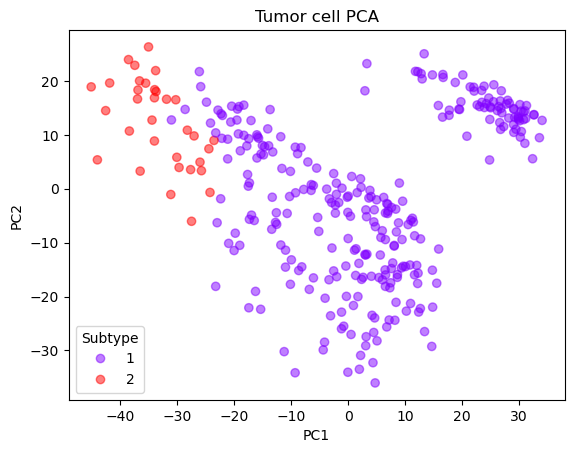

In [14]:
# PCA for tumor cells only
pca_2d_bc_t = PCA(n_components=2)
pca_2d_bc_t.fit(bc_tumor_sc)
bc_tumor_2d_pca = pca_2d_bc_t.transform(bc_tumor_sc)

# not a great proportion, predictably
# 2 clear clusters though
print(f"Proportion of variance explained: {pca_2d_bc_t.explained_variance_ratio_}")

# plot each subtype
# based on the order of the rows still being the same?

fig, ax = plt.subplots()
tumor_pca_scatter = ax.scatter(bc_tumor_2d_pca[:,0], bc_tumor_2d_pca[:,1], c=bc_tumor_sc_details.loc[:,"subtype"], alpha=0.5, cmap="rainbow")
ax.legend(*tumor_pca_scatter.legend_elements(), title="Subtype")
ax.set_title("Tumor cell PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

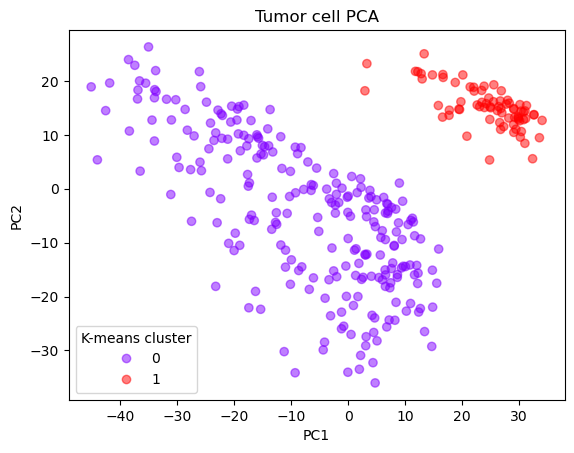

In [15]:
# K-means on the pca to get the clusters?
kmeans = KMeans(n_clusters=2, random_state=1000).fit(bc_tumor_2d_pca)

fig, ax = plt.subplots()
tumor_pca_scatter = ax.scatter(bc_tumor_2d_pca[:,0], bc_tumor_2d_pca[:,1], c=kmeans.labels_, alpha=0.5, cmap="rainbow")
ax.legend(*tumor_pca_scatter.legend_elements(), title="K-means cluster")
ax.set_title("Tumor cell PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# add clusters visible in 2d pca to details dataframe
bc_tumor_sc_details["2d_pca_cluster"] = kmeans.labels_

In [16]:
bc_tumor_sc_details.iloc[220:230,:].loc[:,"2d_pca_cluster"]

BC02_94    0
BC02_95    0
BC02_96    0
BC05_01    1
BC05_02    1
BC05_04    1
BC05_07    1
BC05_08    1
BC05_09    1
BC05_12    1
Name: 2d_pca_cluster, dtype: int32

In [17]:
kmeans.labels_[220:230]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

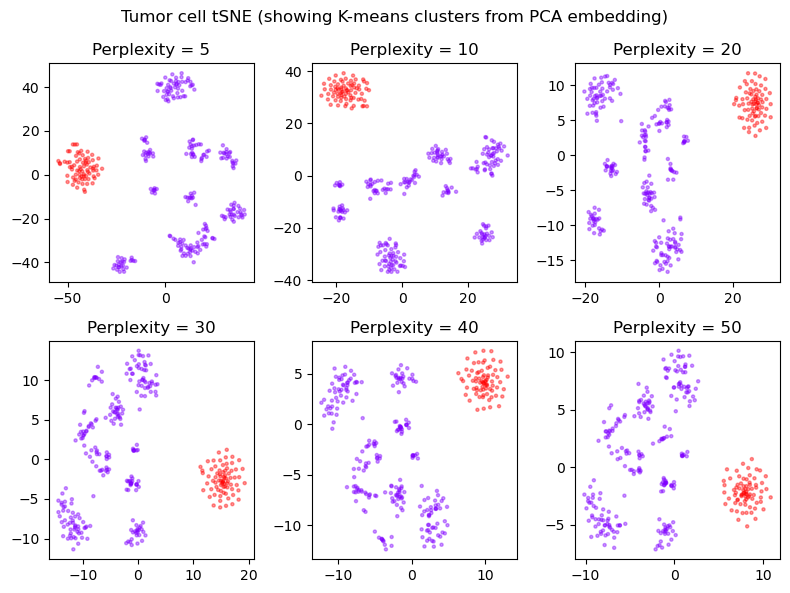

In [18]:
# checking pca clusters against tsne clusters
# tsne with different parameters
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,6))
perplexities = [5, 10, 20, 30, 40, 50]
for i in range(len(perplexities)):
    current_tsne = TSNE(perplexity=perplexities[i], random_state=1000)
    current_embedding = current_tsne.fit_transform(bc_tumor_sc)
    axs[int(np.floor(i/3))][int(i%3)].scatter(current_embedding[:,0], current_embedding[:,1], c=bc_tumor_sc_details["2d_pca_cluster"], s=5, alpha=0.4, cmap="rainbow")
    axs[int(np.floor(i/3))][int(i%3)].set_title(f"Perplexity = {perplexities[i]}")
fig.suptitle("Tumor cell tSNE (showing K-means clusters from PCA embedding)")
plt.tight_layout()
plt.show()

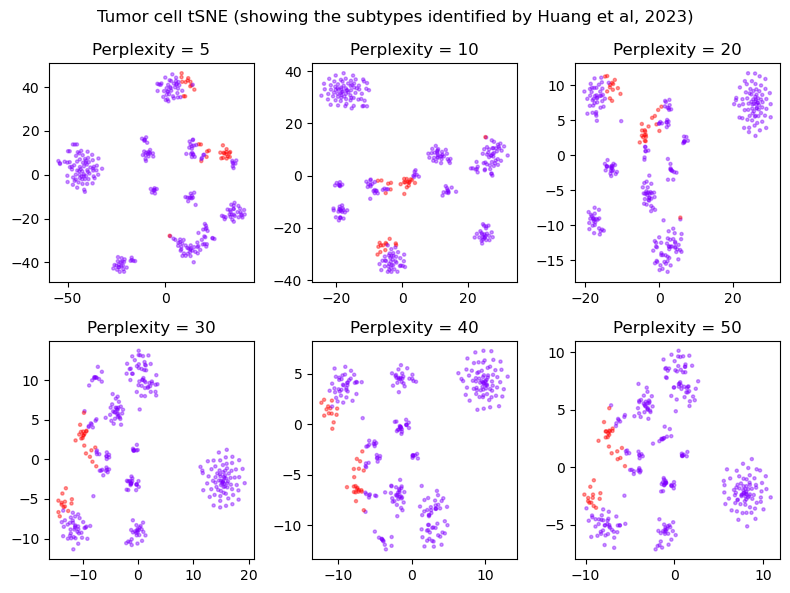

In [19]:
# comparing Huang subtypes to tSNE clusters
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,6))
perplexities = [5, 10, 20, 30, 40, 50]
for i in range(len(perplexities)):
    current_tsne = TSNE(perplexity=perplexities[i], random_state=1000)
    current_embedding = current_tsne.fit_transform(bc_tumor_sc)
    axs[int(np.floor(i/3))][int(i%3)].scatter(current_embedding[:,0], current_embedding[:,1], c=bc_tumor_sc_details["subtype"], s=5, alpha=0.4, cmap="rainbow")#
    axs[int(np.floor(i/3))][int(i%3)].set_title(f"Perplexity = {perplexities[i]}")
fig.suptitle("Tumor cell tSNE (showing the subtypes identified by Huang et al, 2023)")
plt.tight_layout()
plt.show()

In [120]:
#spectral_clustering = SpectralClustering(n_clusters=2, assign_labels="cluster_qr", random_state=1000).fit(bc_tumor_sc)

# add basic spectral clustering labels to details dataframe
#bc_tumor_sc_details["spectral_clustering_2"] = spectral_clustering.labels_

#spectral_clustering.labels_

col_name_format = "spectral_clustering_{value}"
spectral_clustering_col_names = []
spectral_clustering_dict = {}

for i in np.arange(2,13):
    current_spectral_clustering = SpectralClustering(n_clusters=i, assign_labels="cluster_qr", random_state=1000).fit(bc_tumor_sc)
    bc_tumor_sc_details[col_name_format.format(value=i)] = current_spectral_clustering.labels_
    spectral_clustering_col_names.append(col_name_format.format(value=i))
    spectral_clustering_dict[col_name_format.format(value=i)] = i

spectral_clustering_col_names



c:\Users\katie\miniconda3\envs\kf7029_env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\katie\miniconda3\envs\kf7029_env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\katie\miniconda3\envs\kf7029_env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\katie\miniconda3\envs\kf7029_env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\katie\miniconda3\envs\kf7029_env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral emb

['spectral_clustering_2',
 'spectral_clustering_3',
 'spectral_clustering_4',
 'spectral_clustering_5',
 'spectral_clustering_6',
 'spectral_clustering_7',
 'spectral_clustering_8',
 'spectral_clustering_9',
 'spectral_clustering_10',
 'spectral_clustering_11',
 'spectral_clustering_12']

In [21]:
bc_tumor_sc_details["spectral_clustering_4"].unique()

array([3, 2, 1, 0])

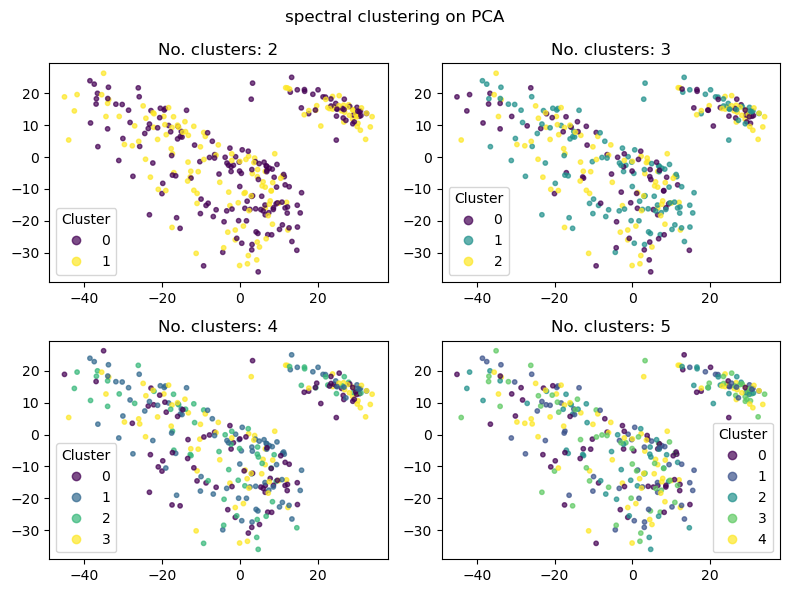

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for i in range(len(spectral_clustering_col_names[:4])):
    ax = axs[int(np.floor(i/2)), int(i%2)]
    tumor_pca_scatter = ax.scatter(bc_tumor_2d_pca[:,0], bc_tumor_2d_pca[:,1], c=bc_tumor_sc_details.loc[:,spectral_clustering_col_names[i]], alpha=0.7, s=10)
    ax.legend(*tumor_pca_scatter.legend_elements(), title="Cluster")
    ax.set_title(f"No. clusters: {spectral_clustering_col_names[i][-1]}")

fig.suptitle("spectral clustering on PCA")
plt.tight_layout()
plt.show()

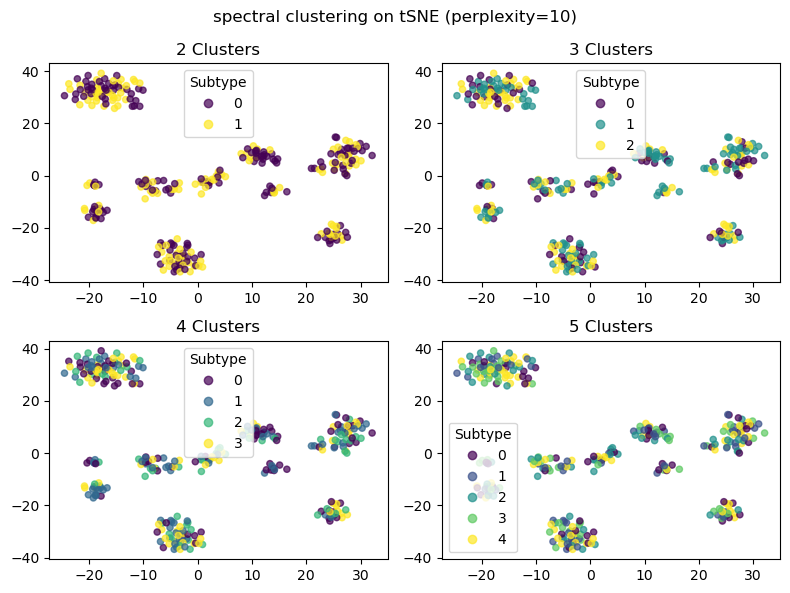

In [132]:
tsne_p10 = TSNE(perplexity=10, random_state=1000)
tsne_p10_embedding = tsne_p10.fit_transform(bc_tumor_sc)

tsne_p30 = TSNE(perplexity=30, random_state=1000)
tsne_p30_embedding = tsne_p30.fit_transform(bc_tumor_sc)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for i in range(len(spectral_clustering_col_names[:4])):
    ax = axs[int(np.floor(i/2)), int(i%2)]
    tumor_pca_scatter = ax.scatter(tsne_p10_embedding[:,0], tsne_p10_embedding[:,1], c=bc_tumor_sc_details.loc[:,spectral_clustering_col_names[i]], alpha=0.7, s=20)
    ax.legend(*tumor_pca_scatter.legend_elements(), title="Subtype")
    ax.set_title(f"{spectral_clustering_col_names[i][-1]} Clusters")

fig.suptitle("spectral clustering on tSNE (perplexity=10)")
plt.tight_layout()
plt.show()

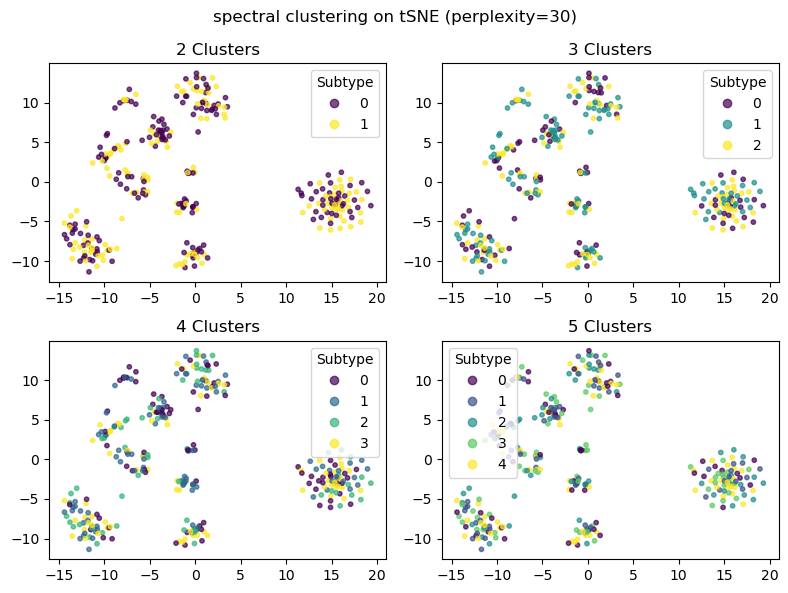

In [133]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for i in range(len(spectral_clustering_col_names[:4])):
    ax = axs[int(np.floor(i/2)), int(i%2)]
    tumor_pca_scatter = ax.scatter(tsne_p30_embedding[:,0], tsne_p30_embedding[:,1], c=bc_tumor_sc_details.loc[:,spectral_clustering_col_names[i]], alpha=0.7, s=10)
    ax.legend(*tumor_pca_scatter.legend_elements(), title="Subtype")
    ax.set_title(f"{spectral_clustering_col_names[i][-1]} Clusters")

fig.suptitle("spectral clustering on tSNE (perplexity=30)")
plt.tight_layout()
plt.show()

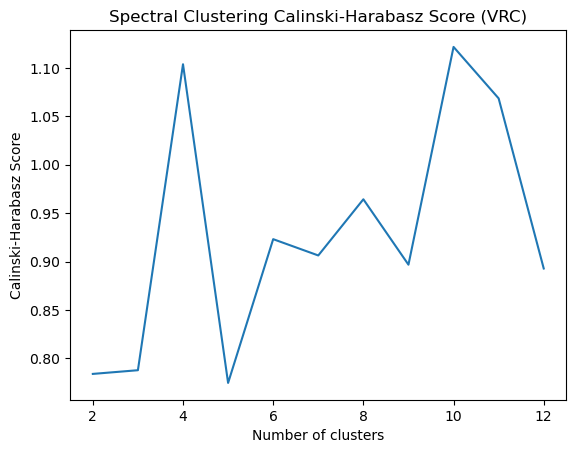

[np.float64(0.7840320226896464), np.float64(0.7878440885714129), np.float64(1.1037082340929691), np.float64(0.7747258697777186), np.float64(0.9231419638949656), np.float64(0.9063175337327048), np.float64(0.9643151817659726), np.float64(0.896798765064223), np.float64(1.1216079858423733), np.float64(1.0684643408916719), np.float64(0.8928547602680926)]
Spectral clustering max c-h score: 1.1216079858423733
Max c-h score for spectral_clustering_10


In [130]:
# 'ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters' (dispersion = sum of distances squared)
# possibly inappropriate due to the high dimensionality? check method used by key paper

no_clusters_list = []
ch_score_list = []

# ONLY WORKS WHILE THERES A MAXIMUM OF 9 CLUSTERS
for i in range(len(spectral_clustering_col_names)):
    no_clusters_list.append(spectral_clustering_dict[spectral_clustering_col_names[i]])
    ch_score_list.append(metrics.calinski_harabasz_score(bc_tumor_sc, bc_tumor_sc_details.loc[:, spectral_clustering_col_names[i]]))

plt.title("Spectral Clustering Calinski-Harabasz Score (VRC)")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.plot(no_clusters_list, ch_score_list)
plt.show()
print(ch_score_list)
print(f"Spectral clustering max c-h score: {max(ch_score_list)}")
print(f"Max c-h score for {spectral_clustering_col_names[ch_score_list.index(max(ch_score_list))]}")


In [25]:
col_name_format = "spectral_co_clustering_{value}"
spectral_co_clustering_col_names = []
spectral_co_clustering_dict = {}
# increased to 11 to get 2-10
# increased again to 2-13 (to include the number of different samples +1 for the isolated point)
for i in np.arange(2,14):
    current_spectral_co_clustering = SpectralCoclustering(n_clusters=i, random_state=1000).fit(bc_tumor_sc)
    bc_tumor_sc_details[col_name_format.format(value=i)] = current_spectral_co_clustering.row_labels_
    spectral_co_clustering_col_names.append(col_name_format.format(value=i))
    # ADDED TO BE ABLE TO ACCESS NUMBER OF CLUSTERS EASILY LATER
    spectral_co_clustering_dict[col_name_format.format(value=i)] = i

spectral_co_clustering_col_names

['spectral_co_clustering_2',
 'spectral_co_clustering_3',
 'spectral_co_clustering_4',
 'spectral_co_clustering_5',
 'spectral_co_clustering_6',
 'spectral_co_clustering_7',
 'spectral_co_clustering_8',
 'spectral_co_clustering_9',
 'spectral_co_clustering_10',
 'spectral_co_clustering_11',
 'spectral_co_clustering_12',
 'spectral_co_clustering_13']

In [26]:
spectral_co_clustering_dict

{'spectral_co_clustering_2': np.int64(2),
 'spectral_co_clustering_3': np.int64(3),
 'spectral_co_clustering_4': np.int64(4),
 'spectral_co_clustering_5': np.int64(5),
 'spectral_co_clustering_6': np.int64(6),
 'spectral_co_clustering_7': np.int64(7),
 'spectral_co_clustering_8': np.int64(8),
 'spectral_co_clustering_9': np.int64(9),
 'spectral_co_clustering_10': np.int64(10),
 'spectral_co_clustering_11': np.int64(11),
 'spectral_co_clustering_12': np.int64(12),
 'spectral_co_clustering_13': np.int64(13)}

In [27]:
print(spectral_co_clustering_col_names[0][-1])

2


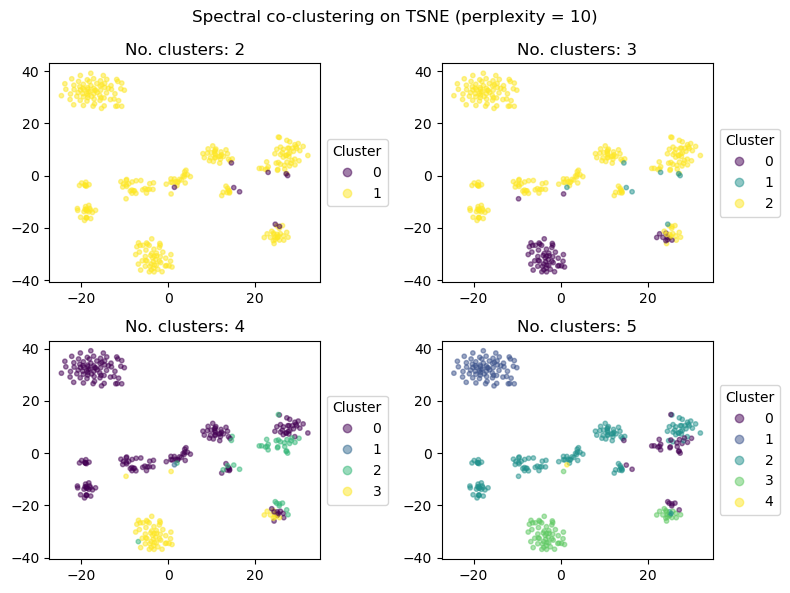

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# not showing all, just the first 4
for i in range(4):
    ax = axs[int(np.floor(i/2)), int(i%2)]
    tumor_tsne_scatter = ax.scatter(tsne_p10_embedding[:,0], 
                                    tsne_p10_embedding[:,1], 
                                    c=bc_tumor_sc_details.loc[:,spectral_co_clustering_col_names[i]],
                                    alpha=0.5,
                                    s=10)
    ax.legend(*tumor_tsne_scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1,0.5), loc="center left")
    ax.set_title(f"No. clusters: {spectral_co_clustering_col_names[i][-1]}")

fig.suptitle("Spectral co-clustering on TSNE (perplexity = 10)")
plt.tight_layout()
plt.show()

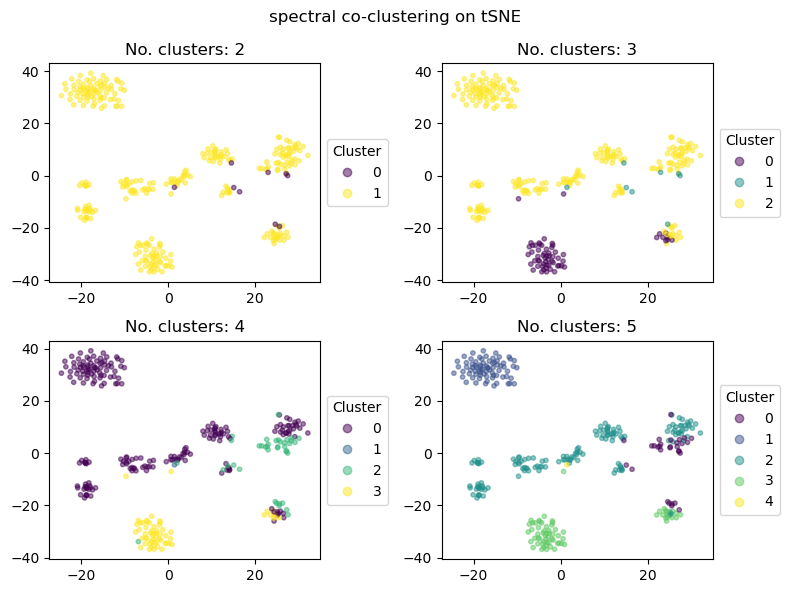

In [29]:
# embedding already created above
# SWITCHED TO 9 [!]
# think about better way to handle without manually changing

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# showing first 4 only
for i in range(4):
    ax = axs[int(np.floor(i/2)), int(i%2)]
    tumor_tsne_scatter = ax.scatter(tsne_p10_embedding[:,0], tsne_p10_embedding[:,1], c=bc_tumor_sc_details.loc[:,spectral_co_clustering_col_names[i]], alpha=0.5, s=10)
    ax.legend(*tumor_tsne_scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1,0.5), loc="center left")
    # ONLY WORKS IF MAX NUMBER OF CLUSTERS IS LESS THAN 10
    ax.set_title(f"No. clusters: {spectral_co_clustering_col_names[i][-1]}")
    

fig.suptitle("spectral co-clustering on tSNE")
plt.tight_layout()
plt.show()

In [108]:
# NEED TO MAKE A DICTIONARY WITH NUMBER OF CLUSTERS AT THE SAME TIME AS DOING THE CLUSTERING

# score_metric needs to be a scikit learn metric function (don't include the brackets)
# additional_args = arguments for score_metric other than X and labels
def plot_alt_clusterings(col_names, col_name_dict, data_df, details_df, embedding, title="", 
                         plots_per_row=3, cmap="plasma", perform_score=False, score_metric=metrics.calinski_harabasz_score,
                         score_metric_name="Calinski-Harabasz",
                         score_additional_args={}, legend_outside=False, round_places=4, point_size=20, figsize=(14,14), alpha=0.7):
    no_plots = len(col_names)
    fig, axs = plt.subplots(nrows=int(np.ceil(no_plots/plots_per_row)), ncols=plots_per_row, figsize=figsize)

    for i in range(no_plots):
        if no_plots > plots_per_row:
            ax = axs[int(np.floor(i/plots_per_row)), int(i%plots_per_row)]
        else:
            ax = axs[i]
        # FIND A MORE DISTINCT SET OF COLOURS [!]
        current_scatter = ax.scatter(embedding[:,0], embedding[:,1], 
                                     c=details_df.loc[:,col_names[i]], 
                                     alpha=alpha, s=point_size, cmap=cmap)
        if legend_outside:
            ax.legend(*current_scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1.02,0.5), loc="center left")
        else:
            ax.legend(*current_scatter.legend_elements(), title="Cluster")

        if perform_score:
            # assumes taking X and labels as first 2 arguments
            # unpacks a dictionary with any additional arguments relevant
            current_score = score_metric(data_df, details_df.loc[:, col_names[i]], **score_additional_args)
            ax.set_title(f"{str(col_name_dict[col_names[i]])} Clusters\n{score_metric_name} Score: {round(current_score, round_places)}")
        else:
            ax.set_title(f"{str(col_name_dict[col_names[i]])} Clusters")

    fig.suptitle(title)
    plt.tight_layout()



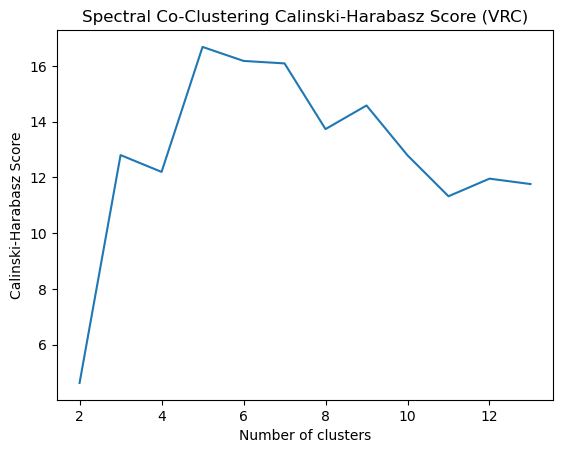

[np.float64(4.625508241147993), np.float64(12.797713111302405), np.float64(12.19461567501905), np.float64(16.67766017031724), np.float64(16.175766993576723), np.float64(16.08628616859433), np.float64(13.73016711156122), np.float64(14.577069872118761), np.float64(12.789707561299752), np.float64(11.320997648036244), np.float64(11.952589844101881), np.float64(11.758802101267563)]
Spectral co-clustering max c-h score: 16.67766017031724
Max c-h score for spectral_clustering_5


In [145]:
# 'ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters' (dispersion = sum of distances squared)
# possibly inappropriate due to the high dimensionality? check method used by key paper

no_clusters_list = []
ch_score_list = []

# ONLY WORKS WHILE THERES A MAXIMUM OF 9 CLUSTERS
for i in range(len(spectral_co_clustering_col_names)):
    no_clusters_list.append(spectral_co_clustering_dict[spectral_co_clustering_col_names[i]])
    ch_score_list.append(metrics.calinski_harabasz_score(bc_tumor_sc, bc_tumor_sc_details.loc[:, spectral_co_clustering_col_names[i]]))

plt.title("Spectral Co-Clustering Calinski-Harabasz Score (VRC)")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.plot(no_clusters_list, ch_score_list)
plt.show()
print(ch_score_list)
print(f"Spectral co-clustering max c-h score: {max(ch_score_list)}")
print(f"Max c-h score for {spectral_clustering_col_names[ch_score_list.index(max(ch_score_list))]}")


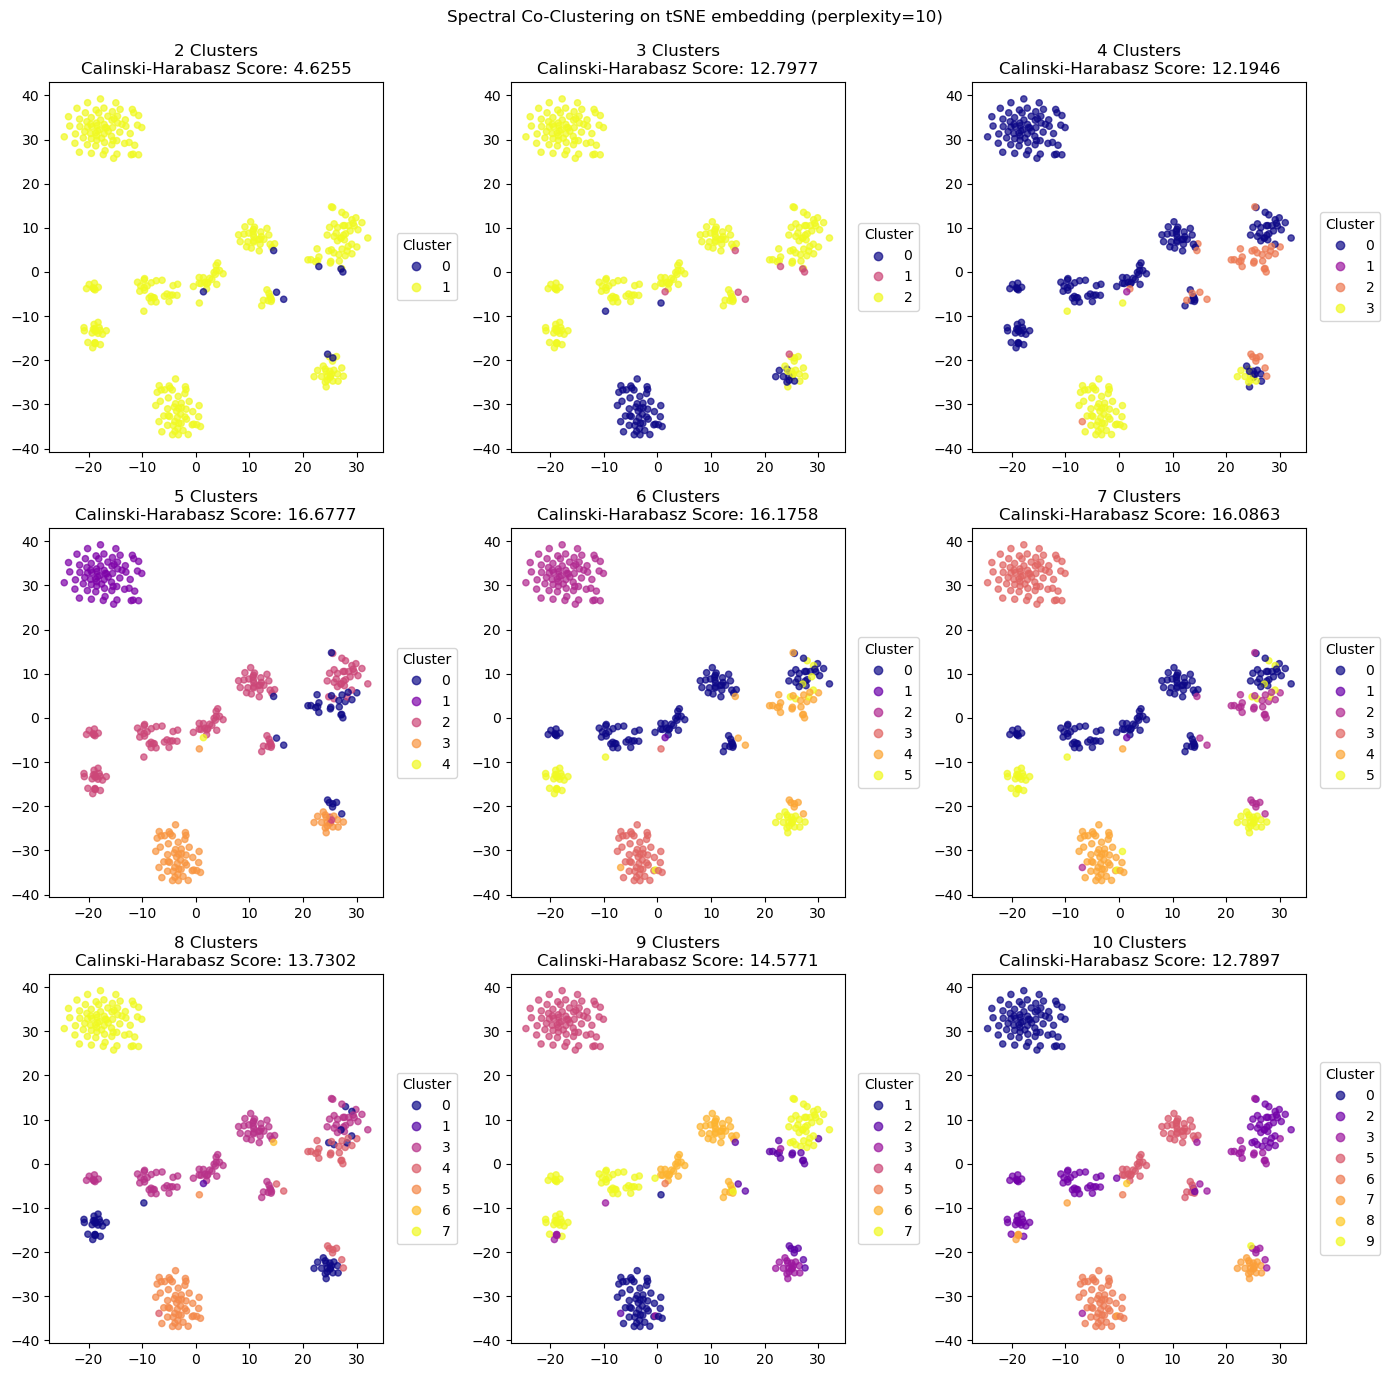

In [31]:
plot_alt_clusterings(col_names=spectral_co_clustering_col_names[:9], # only include first 9
                     col_name_dict=spectral_co_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p10_embedding,
                     title="Spectral Co-Clustering on tSNE embedding (perplexity=10)\n",
                     perform_score=True,
                     legend_outside=True)

In [32]:
# TESTING TORCH

bc_tumor_sc_tensor = torch.from_numpy(np.array(bc_tumor_sc)).float()
bc_tumor_sc_tensor.shape

torch.Size([317, 820])

In [33]:
bc_tumor_sc_tensor.repeat(1,1,10).shape

torch.Size([1, 317, 8200])

In [34]:
[bc_tumor_sc_tensor[:,:,None], bc_tumor_sc_tensor]


[tensor([[[5.3581],
          [0.1133],
          [0.0000],
          ...,
          [6.2760],
          [6.3227],
          [0.0000]],
 
         [[4.7989],
          [0.7561],
          [5.0828],
          ...,
          [6.0661],
          [6.3706],
          [0.0000]],
 
         [[4.6078],
          [4.5480],
          [5.5160],
          ...,
          [1.8374],
          [5.8609],
          [0.0000]],
 
         ...,
 
         [[4.3451],
          [3.6671],
          [0.4574],
          ...,
          [4.2287],
          [4.5364],
          [0.1823]],
 
         [[4.6775],
          [1.7901],
          [3.1872],
          ...,
          [6.7945],
          [7.8165],
          [0.0000]],
 
         [[5.6697],
          [2.9684],
          [5.7481],
          ...,
          [7.2906],
          [8.0241],
          [0.0000]]]),
 tensor([[5.3581, 0.1133, 0.0000,  ..., 6.2760, 6.3227, 0.0000],
         [4.7989, 0.7561, 5.0828,  ..., 6.0661, 6.3706, 0.0000],
         [4.6078, 4.5480, 

In [35]:
# PCA actual subtypes
# SAMPLES AND CORRESPONDING SUBTYPES FROM DATA PAPER
# BC03LN and BC07LN are lymph node metastases
sample_clinical_subtype_dict = {
    "BC01" : "luminal_A",
    "BC02" : "luminal_A",
    "BC03" : "luminal_B",
    "BC04" : "HER2",
    "BC05" : "HER2",
    "BC06" : "HER2",
    "BC07" : "TNBC",
    "BC08" : "TNBC",
    "BC09" : "TNBC",
    "BC10" : "TNBC",
    "BC11" : "TNBC",
    "BC03LN" : "luminal_B",
    "BC07LN" : "TNBC"
}

clinical_subtype_int_dict = {
    "luminal_A" : 1,
    "luminal_B" : 2,
    "HER2" : 3,
    "TNBC" : 4
}



In [36]:
# seperate out the sample id from each cell id
#print(list(map(lambda element : element.split("_")[0], bc_tumor_sc.index)))

# map sample id to subtype for each cell id
#print(list(map(lambda element : sample_clinical_subtype_dict[element.split("_")[0]], bc_tumor_sc.index)))

# adding a column to details with which sample the cell is from
bc_tumor_sc_details["sample"] = list(map(lambda element : element.split("_")[0], bc_tumor_sc.index))

# adding a column to details with clinical subtype name
bc_tumor_sc_details["clinical_subtype"] = list(map(lambda element : sample_clinical_subtype_dict[element.split("_")[0]], bc_tumor_sc.index))

# adding a column to details with clinical subtype number
bc_tumor_sc_details["clinical_subtype_no"] = list(map(lambda element : clinical_subtype_int_dict[element], bc_tumor_sc_details["clinical_subtype"]))
#list(map(lambda element : clinical_subtype_int_dict[element], bc_tumor_sc_details["clinical_subtype"]))

In [37]:
#bc_tumor_sc_details[["clinical_subtype_no", "clinical_subtype"]]

In [38]:
plt.cm.plasma(np.linspace(0, 1, 10))[0]

array([0.050383, 0.029803, 0.527975, 1.      ])

In [61]:
# REPLACING WITH VERSION USED FOR DATASET 1
"""
# plot a given clustering on a given embedding
# use_preset_colours allows a consistent set of colours to be used across subplots
def plot_clustering_on_embedding(embedding, clusters, title, legend_title="Clusters",
                                 existing_plot=False, existing_ax=False, 
                                 use_preset_colours=False, preset_colours=False,
                                 cmap_function=plt.cm.nipy_spectral, legend_outside=False, point_size=20):
    if existing_plot:
        ax = existing_ax
    else:
        fig, ax = plt.subplots()

    cluster_names = np.unique(clusters)

    # colours
    if use_preset_colours:
        colours = preset_colours
    else:
        colours = cmap_function(np.linspace(0, 1, len(cluster_names)))

    #print(cluster_names)
    for i in range(len(cluster_names)):
        # [?]
        ax.scatter(embedding[(clusters == cluster_names[i]), 0],
                   embedding[(clusters == cluster_names[i]), 1],
                   alpha = 0.7, s=point_size, label=cluster_names[i],
                   c=colours[i])


    #scatter = ax.scatter(embedding[:,0], embedding[:,1],
    #                    c=clusters, alpha=0.7, s=20, cmap=cmap)
    #ax.legend(*scatter.legend_elements(), title="Cluster")
    if legend_outside:
        ax.legend(title=legend_title, bbox_to_anchor=(1.02,0.5), loc="center left")
    else:
        ax.legend(title=legend_title)
    ax.set_title(title)

    plt.tight_layout()
"""


'\n# plot a given clustering on a given embedding\n# use_preset_colours allows a consistent set of colours to be used across subplots\ndef plot_clustering_on_embedding(embedding, clusters, title, legend_title="Clusters",\n                                 existing_plot=False, existing_ax=False, \n                                 use_preset_colours=False, preset_colours=False,\n                                 cmap_function=plt.cm.nipy_spectral, legend_outside=False, point_size=20):\n    if existing_plot:\n        ax = existing_ax\n    else:\n        fig, ax = plt.subplots()\n\n    cluster_names = np.unique(clusters)\n\n    # colours\n    if use_preset_colours:\n        colours = preset_colours\n    else:\n        colours = cmap_function(np.linspace(0, 1, len(cluster_names)))\n\n    #print(cluster_names)\n    for i in range(len(cluster_names)):\n        # [?]\n        ax.scatter(embedding[(clusters == cluster_names[i]), 0],\n                   embedding[(clusters == cluster_names[i]), 1]

In [62]:
# plot a given clustering on a given embedding
# use_preset_colours allows a consistent set of colours to be used across subplots
def plot_clustering_on_embedding(embedding, clusters, title, legend_title="Clusters",
                                 existing_plot=False, existing_ax=False, 
                                 use_preset_colours=False, preset_colours=False,
                                 cmap_function=plt.cm.nipy_spectral, legend_outside=False, 
                                 point_size=20, alpha=0.7, do_legend=True, return_legend=False):
    if existing_plot:
        ax = existing_ax
    else:
        fig, ax = plt.subplots()

    cluster_names = np.unique(clusters)

    # colours
    if use_preset_colours:
        colours = preset_colours
    else:
        colours = cmap_function(np.linspace(0, 1, len(cluster_names)))

    #print(cluster_names)
    for i in range(len(cluster_names)):
        # [?]
        ax.scatter(embedding[(clusters == cluster_names[i]), 0],
                   embedding[(clusters == cluster_names[i]), 1],
                   alpha = alpha, s=point_size, label=cluster_names[i],
                   color=colours[i]) # [?]


    #scatter = ax.scatter(embedding[:,0], embedding[:,1],
    #                    c=clusters, alpha=0.7, s=20, cmap=cmap)
    #ax.legend(*scatter.legend_elements(), title="Cluster")
    if do_legend and legend_outside:
        ax.legend(title=legend_title, bbox_to_anchor=(1.02,0.5), loc="center left")
    elif do_legend:
        ax.legend(title=legend_title)
    ax.set_title(title)

    plt.tight_layout()

    if return_legend:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        return legend_handles, legend_labels

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


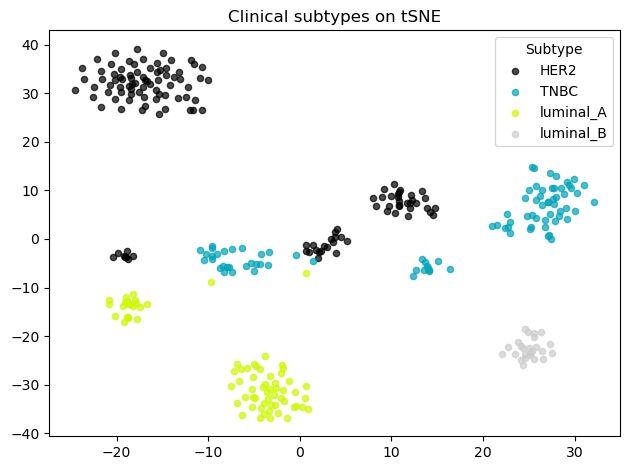

In [40]:
# WHY HAS tsne_p10_embedding CHANGED BETWEEN HERE AND THE LAST PLOT? <- wasn't using a random state

plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes on tSNE",
                             legend_title="Subtype")

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


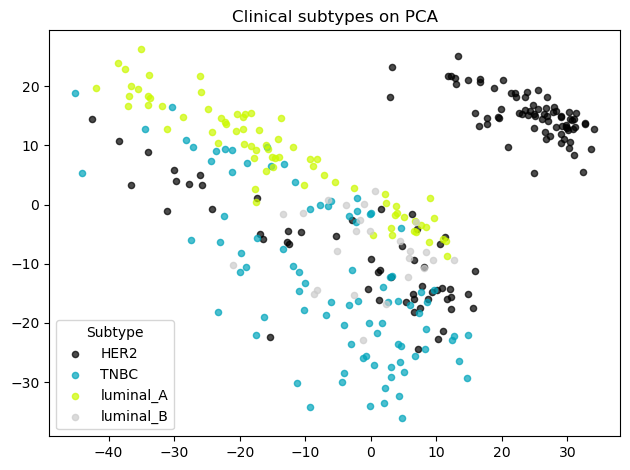

In [41]:
plot_clustering_on_embedding(bc_tumor_2d_pca, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes on PCA",
                             legend_title="Subtype")

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


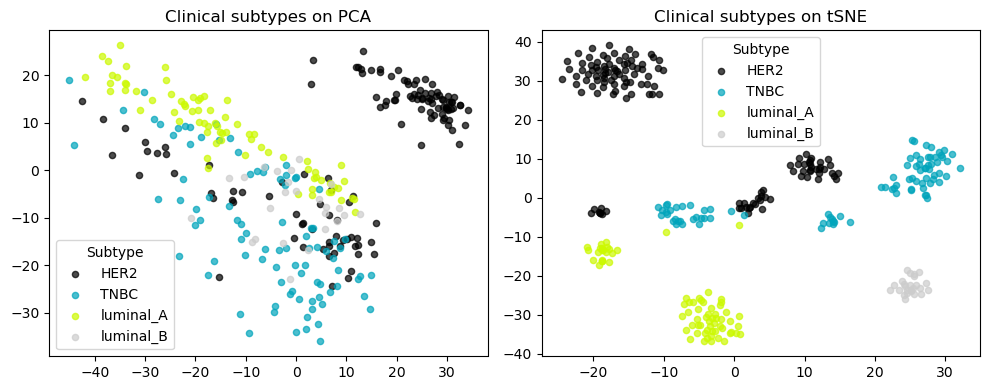

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_clustering_on_embedding(bc_tumor_2d_pca, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes on PCA",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[0])
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes on tSNE",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[1])



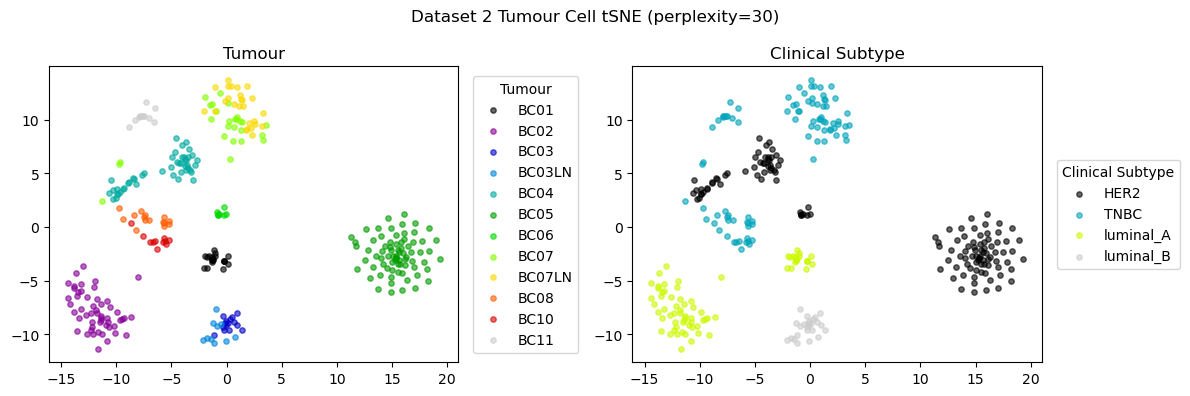

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plot_clustering_on_embedding(tsne_p30_embedding, 
                             bc_tumor_sc_details["sample"], 
                             "Tumour",
                             legend_title="Tumour",
                             existing_plot=True,
                             existing_ax=axs[0],
                             legend_outside=True,
                             alpha=0.6,
                             point_size=15)
plot_clustering_on_embedding(tsne_p30_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical Subtype",
                             legend_title="Clinical Subtype",
                             existing_plot=True,
                             existing_ax=axs[1],
                             legend_outside=True,
                             alpha=0.6,
                             point_size=15)
fig.suptitle("Dataset 2 Tumour Cell tSNE (perplexity=30)")
plt.tight_layout()
plt.show()

In [43]:
spectral_co_clustering_col_names

['spectral_co_clustering_2',
 'spectral_co_clustering_3',
 'spectral_co_clustering_4',
 'spectral_co_clustering_5',
 'spectral_co_clustering_6',
 'spectral_co_clustering_7',
 'spectral_co_clustering_8',
 'spectral_co_clustering_9',
 'spectral_co_clustering_10',
 'spectral_co_clustering_11',
 'spectral_co_clustering_12',
 'spectral_co_clustering_13']

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


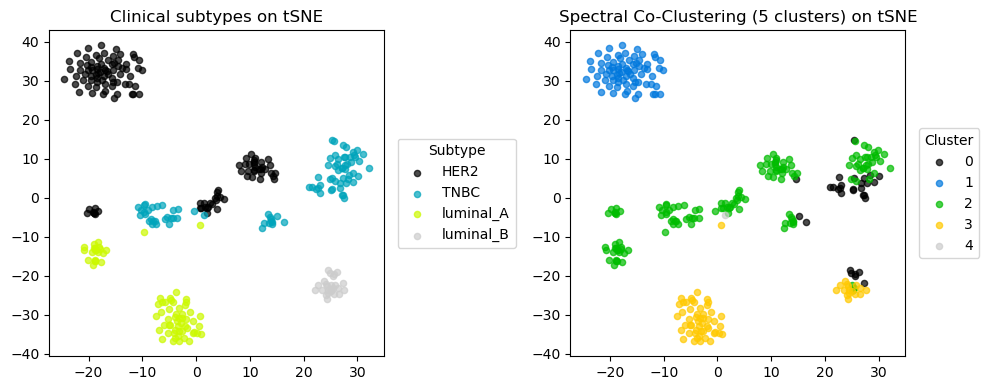

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes on tSNE",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[0],
                             legend_outside=True)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["spectral_co_clustering_5"], 
                             "Spectral Co-Clustering (5 clusters) on tSNE",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[1],
                             legend_outside=True)

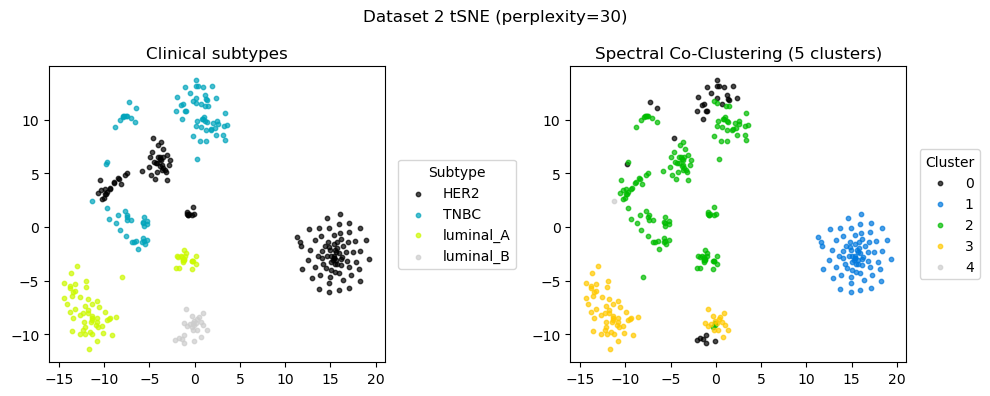

In [148]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_clustering_on_embedding(tsne_p30_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[0],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p30_embedding, 
                             bc_tumor_sc_details["spectral_co_clustering_5"], 
                             "Spectral Co-Clustering (5 clusters)",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[1],
                             legend_outside=True,
                             point_size=10)
fig.suptitle("Dataset 2 tSNE (perplexity=30)")
plt.tight_layout()

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


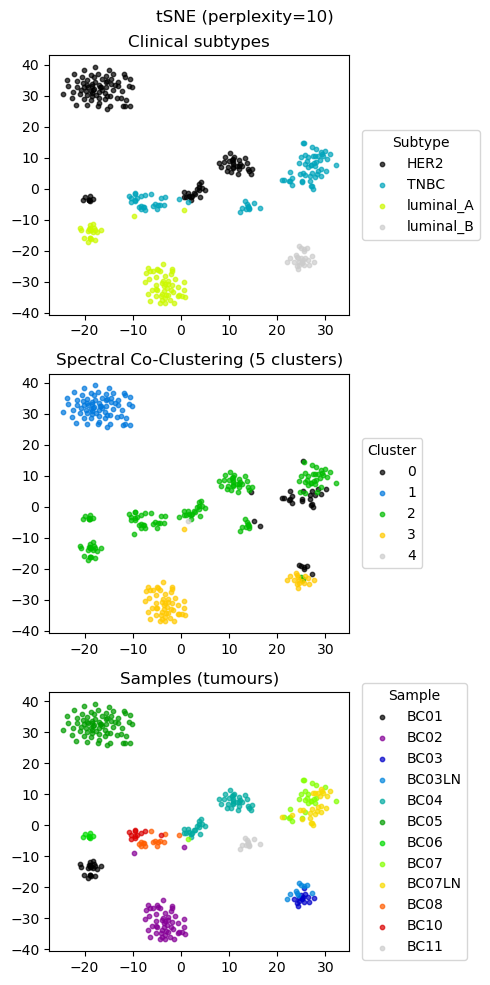

In [45]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,10))
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[0],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["spectral_co_clustering_5"], 
                             "Spectral Co-Clustering (5 clusters)",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[1],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["sample"], 
                             "Samples (tumours)",
                             legend_title="Sample",
                             existing_plot=True,
                             existing_ax=axs[2],
                             legend_outside=True,
                             point_size=10)
fig.suptitle("tSNE (perplexity=10)")
plt.tight_layout()
plt.show()

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


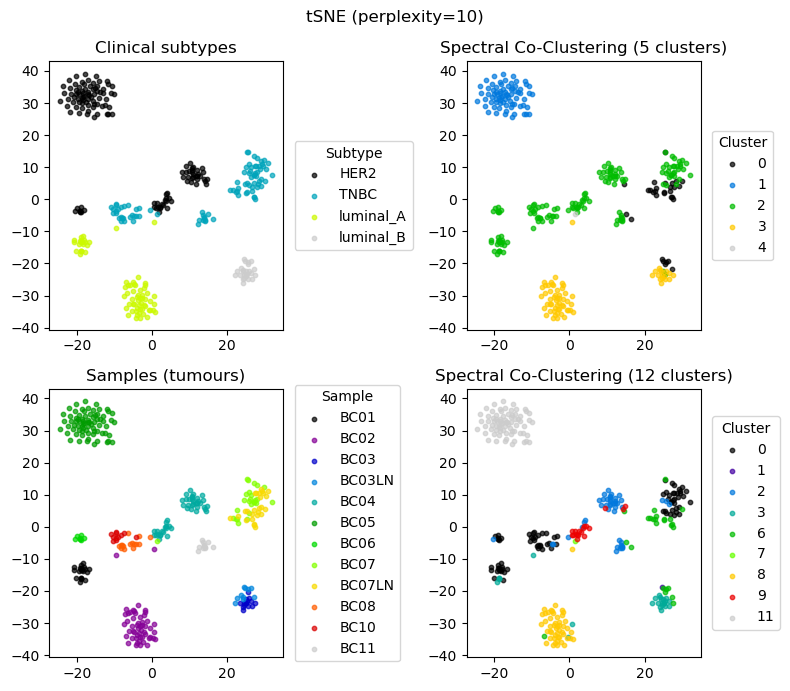

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,7))
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["clinical_subtype"], 
                             "Clinical subtypes",
                             legend_title="Subtype",
                             existing_plot=True,
                             existing_ax=axs[0,0],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["spectral_co_clustering_5"], 
                             "Spectral Co-Clustering (5 clusters)",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[0,1],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["sample"], 
                             "Samples (tumours)",
                             legend_title="Sample",
                             existing_plot=True,
                             existing_ax=axs[1,0],
                             legend_outside=True,
                             point_size=10)
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["spectral_co_clustering_12"], 
                             "Spectral Co-Clustering (12 clusters)",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[1,1],
                             legend_outside=True,
                             point_size=10)
fig.suptitle("tSNE (perplexity=10)")
plt.tight_layout()
plt.show()

C:\Users\katie\AppData\Local\Temp\ipykernel_34084\2441240696.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(embedding[(clusters == cluster_names[i]), 0],


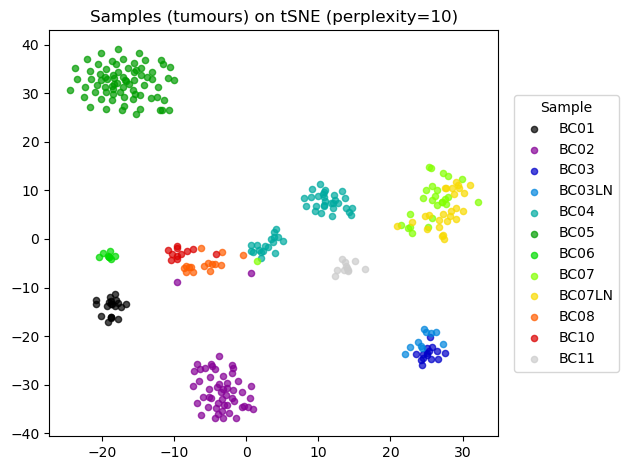

In [47]:
plot_clustering_on_embedding(tsne_p10_embedding, 
                             bc_tumor_sc_details["sample"], 
                             "Samples (tumours) on tSNE (perplexity=10)",
                             legend_title="Sample",
                             legend_outside=True)

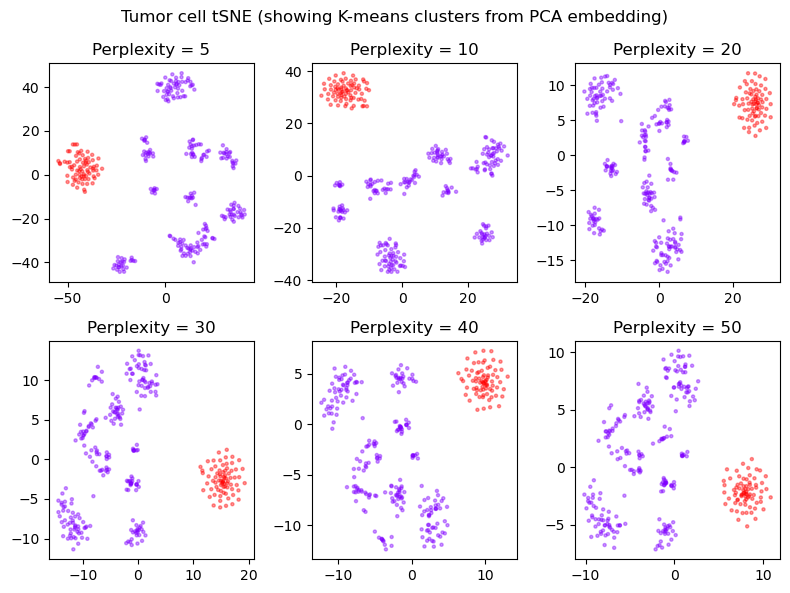

In [48]:
# checking pca clusters against tsne clusters
# tsne with different parameters
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,6))
perplexities = [5, 10, 20, 30, 40, 50]
for i in range(len(perplexities)):
    current_tsne = TSNE(perplexity=perplexities[i], random_state=1000)
    current_embedding = current_tsne.fit_transform(bc_tumor_sc)
    axs[int(np.floor(i/3))][int(i%3)].scatter(current_embedding[:,0], current_embedding[:,1], c=bc_tumor_sc_details["2d_pca_cluster"], s=5, alpha=0.4, cmap="rainbow")
    axs[int(np.floor(i/3))][int(i%3)].set_title(f"Perplexity = {perplexities[i]}")
fig.suptitle("Tumor cell tSNE (showing K-means clusters from PCA embedding)")
plt.tight_layout()
plt.show()

In [49]:
# visualising clusters from different epochs from original key paper code


In [50]:
# switch over to seaborn?

In [51]:
# REDO DETAILS DF SO IT DOESN'T HAVE THE ACTUAL DATA JUST THE CLUSTERING

In [52]:
# clustering within a (large sample) tumor and within a subtype

In [53]:
# from methods
import scipy.io as sio

data_org = sio.loadmat("C:/Users/katie/Downloads/FCAC/FCAC/data/segment_uni_norm.mat")['fea']
data_org.shape

(2310, 19)

In [54]:
import numpy as np
for i in np.arange(1,1):
    print(i)

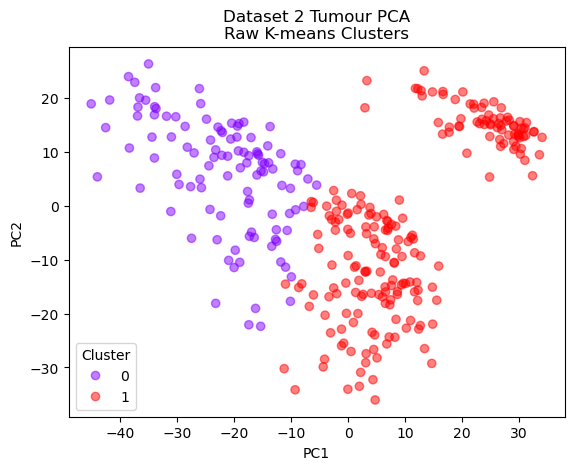

In [76]:
# K-means clustering on original dataset 2 feature space
raw_kmeans = KMeans(n_clusters=2, random_state=1000).fit(bc_tumor_sc)

fig, ax = plt.subplots()
tumor_pca_scatter = ax.scatter(bc_tumor_2d_pca[:,0], bc_tumor_2d_pca[:,1], c=raw_kmeans.labels_, alpha=0.5, cmap="rainbow")
ax.legend(*tumor_pca_scatter.legend_elements(), title="Cluster")
ax.set_title("Dataset 2 Tumour PCA\nRaw K-means Clusters")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# add clusters visible in 2d pca to details dataframe
bc_tumor_sc_details["raw_k_means_2"] = raw_kmeans.labels_

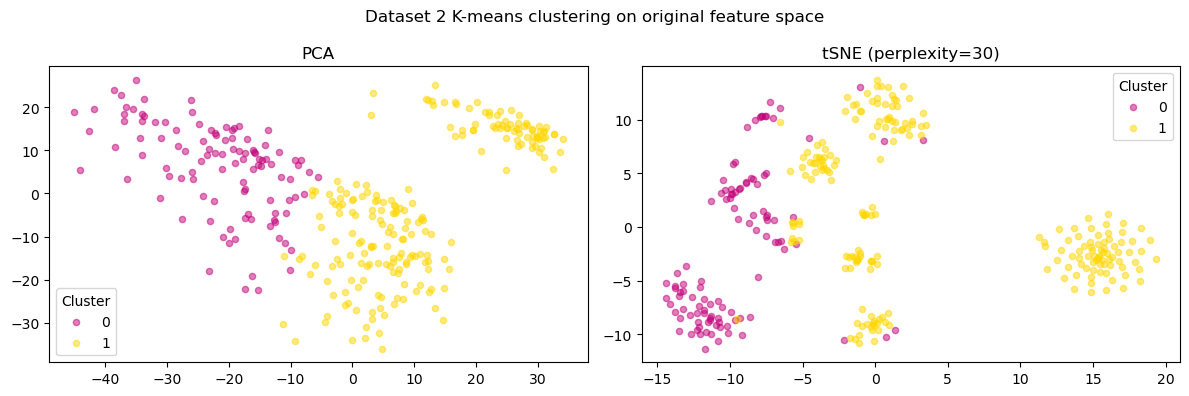

In [87]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plot_clustering_on_embedding(bc_tumor_2d_pca, 
                             bc_tumor_sc_details["raw_k_means_2"], 
                             "PCA",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[0],
                             legend_outside=False,
                             use_preset_colours=True,
                             preset_colours=["#C20078", "gold"],
                             alpha=0.5)
plot_clustering_on_embedding(tsne_p30_embedding, 
                             bc_tumor_sc_details["raw_k_means_2"], 
                             "tSNE (perplexity=30)",
                             legend_title="Cluster",
                             existing_plot=True,
                             existing_ax=axs[1],
                             legend_outside=False,
                             use_preset_colours=True,
                             preset_colours=["#C20078", "gold"],
                             alpha=0.5)
fig.suptitle("Dataset 2 K-means clustering on original feature space")
plt.tight_layout()
plt.show()

In [93]:
col_name_format = "raw_k_means_{value}"
raw_k_means_col_names = []
raw_k_means_dict = {}
raw_k_means_no_clusters = np.arange(2,13)
raw_k_means_inertia = []
for current_no_clusters in raw_k_means_no_clusters:
    current_kmeans = KMeans(n_clusters=current_no_clusters, random_state=1000).fit(bc_tumor_sc)
    bc_tumor_sc_details[col_name_format.format(value=current_no_clusters)] = current_kmeans.labels_
    raw_k_means_col_names.append(col_name_format.format(value=current_no_clusters))
    raw_k_means_dict[col_name_format.format(value=current_no_clusters)] = current_no_clusters
    # inertia = within cluster sum of squares
    raw_k_means_inertia.append(current_kmeans.inertia_)

raw_k_means_col_names

['raw_k_means_2',
 'raw_k_means_3',
 'raw_k_means_4',
 'raw_k_means_5',
 'raw_k_means_6',
 'raw_k_means_7',
 'raw_k_means_8',
 'raw_k_means_9',
 'raw_k_means_10',
 'raw_k_means_11',
 'raw_k_means_12']

Text(0.5, 1.0, 'Dataset 2 K-Means Clustering on Original Feature Space\nWithin Cluster Sum of Squares')

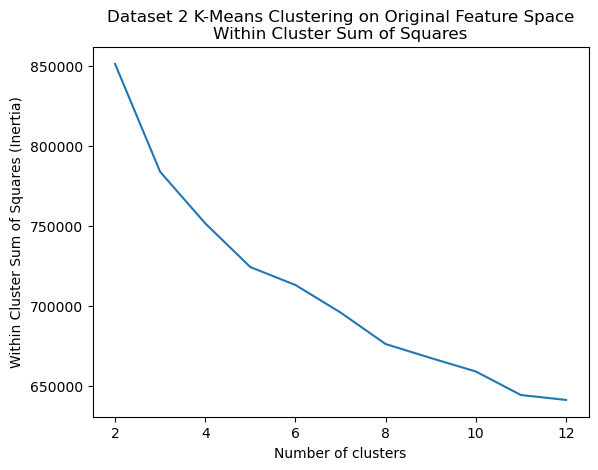

In [95]:
plt.plot(raw_k_means_no_clusters, raw_k_means_inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares (Inertia)")
plt.title("Dataset 2 K-Means Clustering on Original Feature Space\nWithin Cluster Sum of Squares")

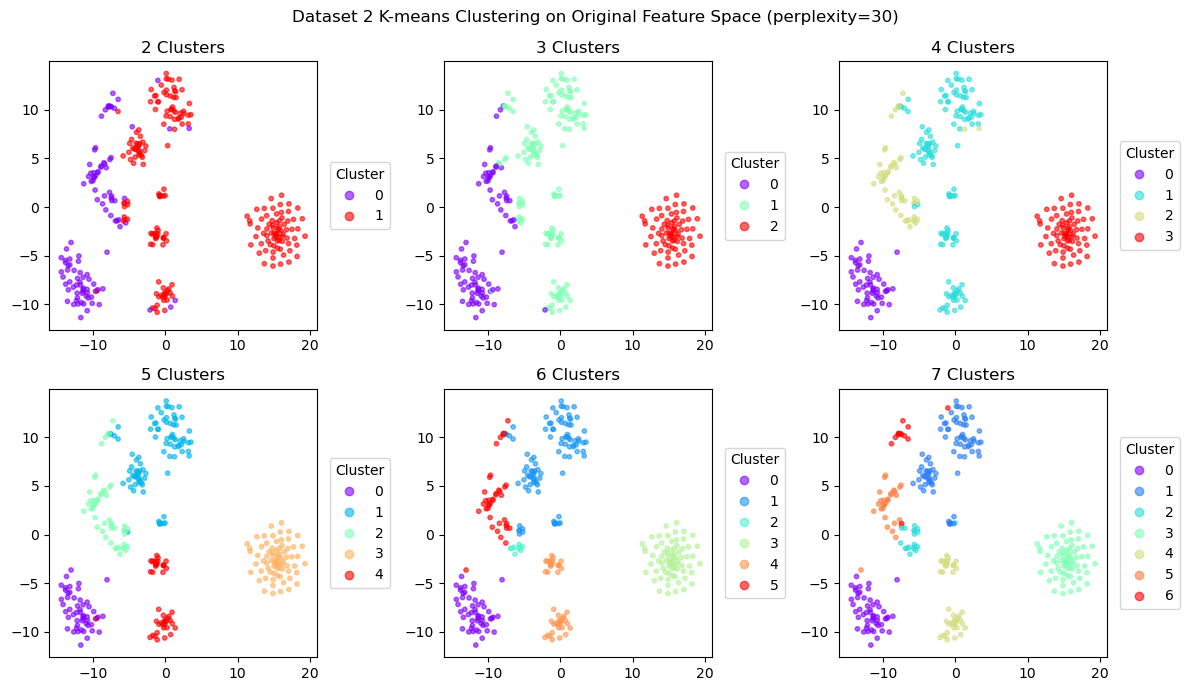

In [106]:
plot_alt_clusterings(col_names=raw_k_means_col_names[:6], # only include first 6
                     col_name_dict=raw_k_means_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="Dataset 2 K-means Clustering on Original Feature Space (perplexity=30)",
                     perform_score=False,
                     legend_outside=True,
                     figsize=(12,7),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

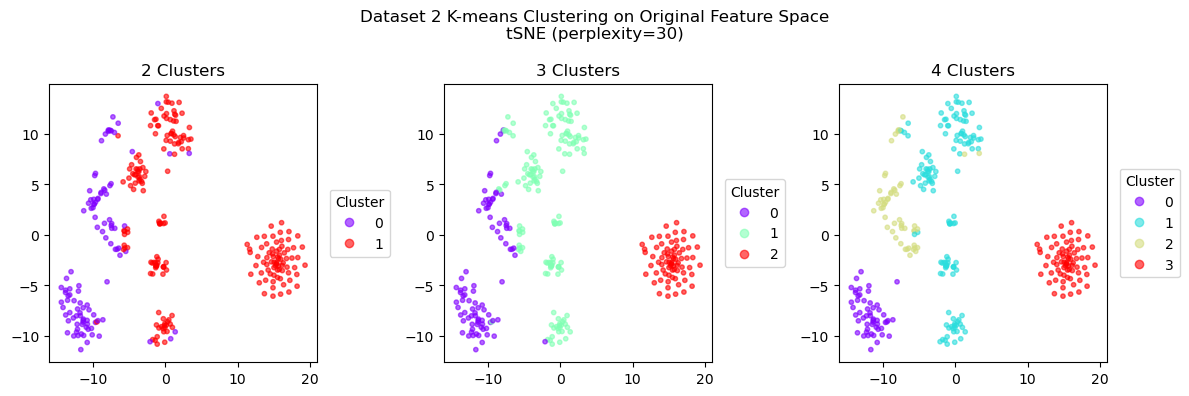

In [135]:
plot_alt_clusterings(col_names=raw_k_means_col_names[:3], # only include first 6
                     col_name_dict=raw_k_means_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="Dataset 2 K-means Clustering on Original Feature Space\ntSNE (perplexity=30)",
                     perform_score=False,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

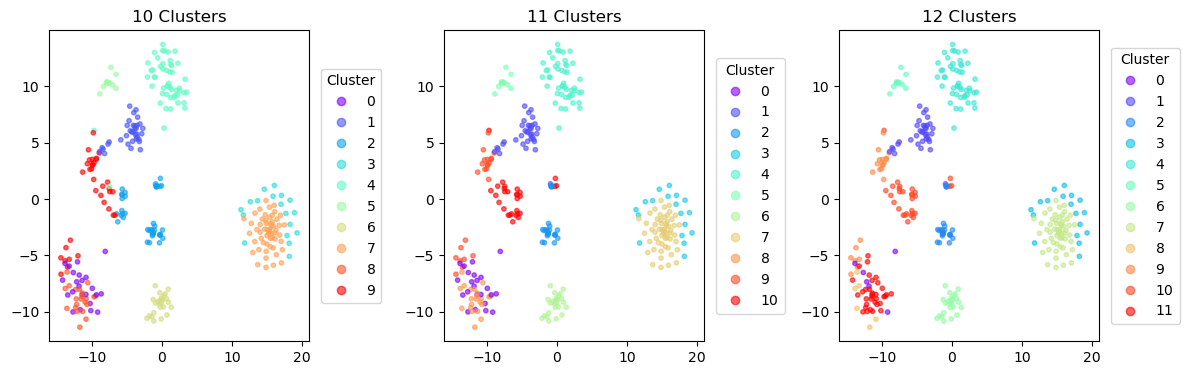

In [116]:
plot_alt_clusterings(col_names=raw_k_means_col_names[8:11], # only include first 6
                     col_name_dict=raw_k_means_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="",
                     #title="Dataset 2 K-means Clustering on Original Feature Space (perplexity=30)",
                     perform_score=False,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

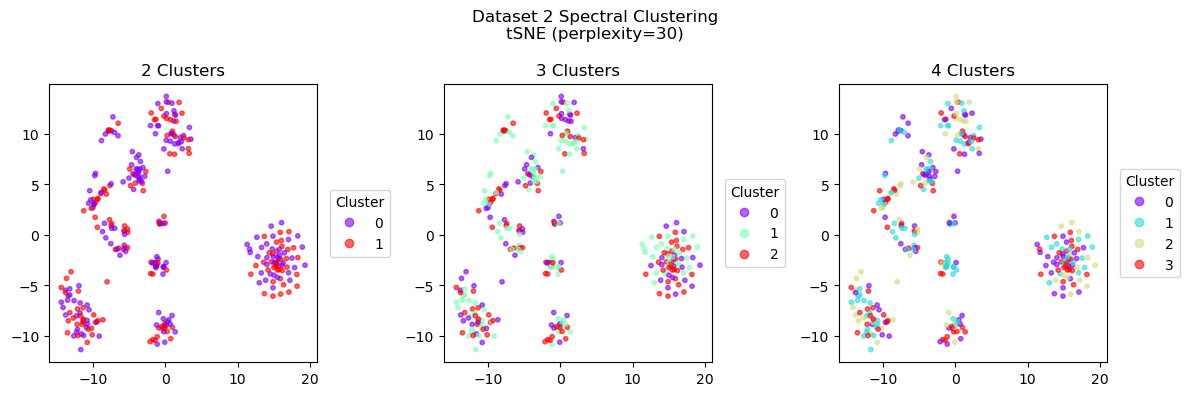

In [136]:
plot_alt_clusterings(col_names=spectral_clustering_col_names[:3], # only include first 6
                     col_name_dict=spectral_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="Dataset 2 Spectral Clustering\ntSNE (perplexity=30)",
                     perform_score=False,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

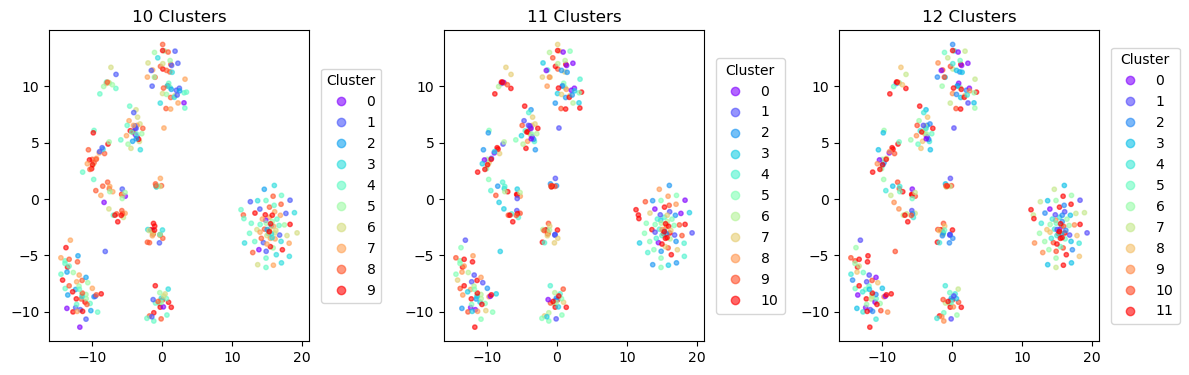

In [138]:
plot_alt_clusterings(col_names=spectral_clustering_col_names[8:11], # only include first 6
                     col_name_dict=spectral_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="",
                     perform_score=False,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

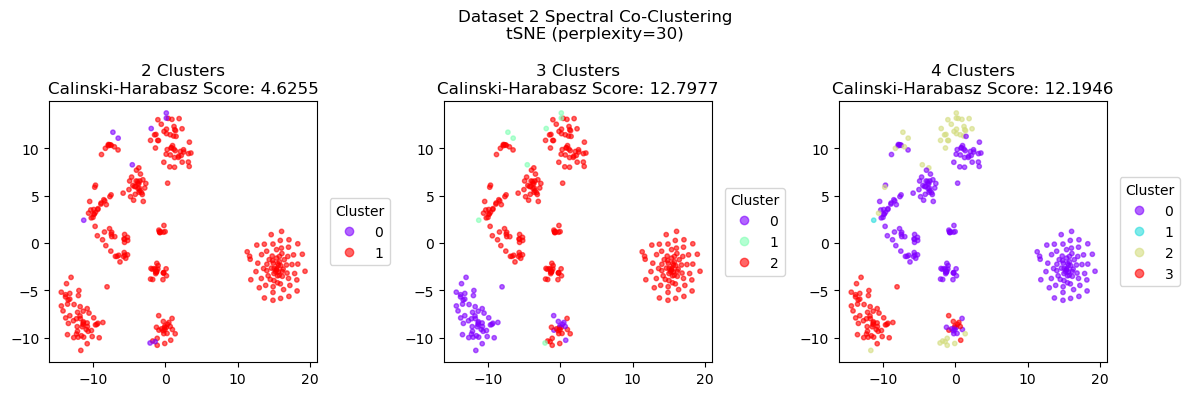

In [139]:
plot_alt_clusterings(col_names=spectral_co_clustering_col_names[:3], # only include first 6
                     col_name_dict=spectral_co_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="Dataset 2 Spectral Co-Clustering\ntSNE (perplexity=30)",
                     perform_score=True,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

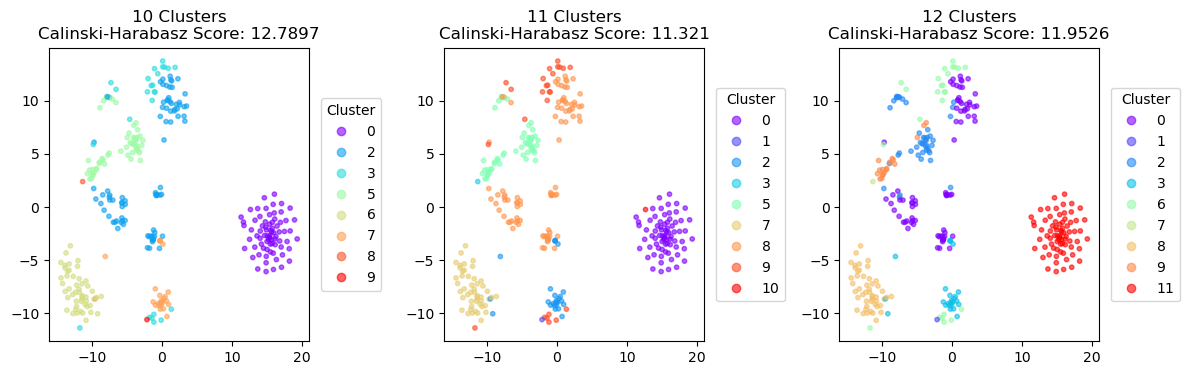

In [140]:
plot_alt_clusterings(col_names=spectral_co_clustering_col_names[8:11], # only include first 6
                     col_name_dict=spectral_co_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="",
                     perform_score=True,
                     legend_outside=True,
                     figsize=(12,4),
                     point_size=10,
                     alpha=0.6,
                     cmap="rainbow")

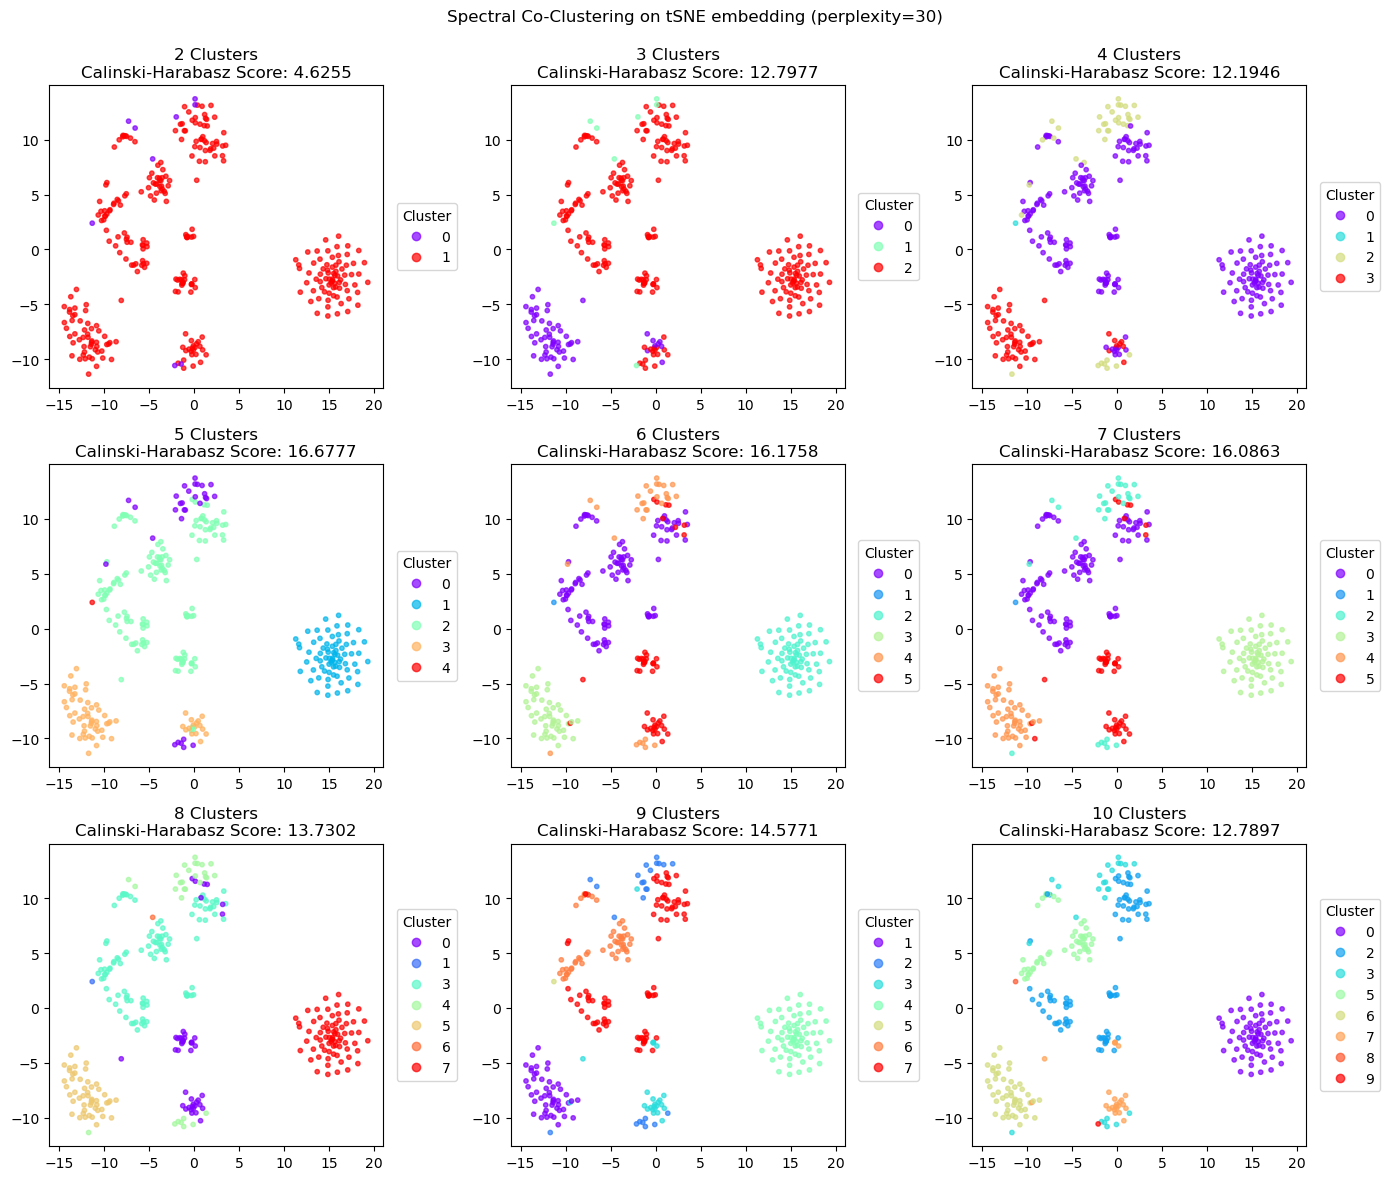

In [144]:
plot_alt_clusterings(col_names=spectral_co_clustering_col_names[:9], # only include first 9
                     col_name_dict=spectral_co_clustering_dict,
                     data_df=bc_tumor_sc,
                     details_df=bc_tumor_sc_details,
                     embedding=tsne_p30_embedding,
                     title="Spectral Co-Clustering on tSNE embedding (perplexity=30)\n",
                     perform_score=True,
                     legend_outside=True,
                     cmap="rainbow",
                     figsize=(14,12),
                     point_size=10)

In [ ]:
"""
col_name_format = "dbscan_euclid_eps_{value}"
dbscan_col_names = []
dbscan_euclid_dict = {}
eps_list = 
for eps in eps_list:
    current_dbscan = DBSCAN(eps=eps, metric="euclidean").fit(bc_tumor_sc)
    bc_tumor_sc_details[col_name_format.format(value=eps)] = current_dbscan.labels_
    dbscan_col_names.append(col_name_format.format(value=eps))
    dbscan_euclid_dict[col_name_format.format(value=eps)] = eps

dbscan_col_names
"""